# Regularization in Machine Learning: Part 1

Dive deep into model generalizability, bias-variance trade-offs, and the art of regularization. Learn about L2 and L1 penalties and automatic feature selection. Apply these techniques to a real-world use-case!

Read the [full article for this notebook at mdrk.io](https://mdrk.io/regularization-in-machine-learning-part1/)

In [1]:
from matplotlib import rc

rc("animation", html="html5")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

## Overfitting and underfitting a model 

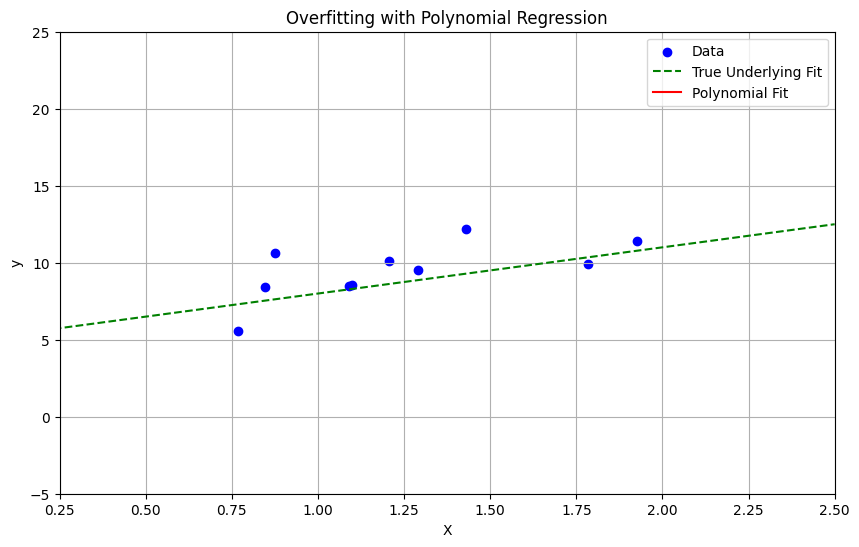

In [2]:
# Generate synthetic data with noise
np.random.seed(0)
X = 2 * np.random.rand(10, 1)
y = 5 + 3 * X + np.random.randn(10, 1) * 2  # Introduce noise with higher variance

# True underlying relationship
X_true = np.linspace(0, 2.5, 100).reshape(-1, 1)
y_true = 5 + 3 * X_true

# Define the range of polynomial degrees
degrees = np.arange(1, len(X))  # Range from 1 to number of data points minus one

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
scat = ax.scatter(X, y, color="blue", label="Data")

# Plot the true underlying relationship
ax.plot(X_true, y_true, color="green", label="True Underlying Fit", linestyle="--")

# Initialize empty line for plotting polynomial fit
(poly_line,) = ax.plot([], [], color="red", label="Polynomial Fit")

# Initialize text annotation for model definition
text_model = ax.text(
    0.5, 0.8, "", transform=ax.transAxes, ha="center", va="top", fontsize=11
)

# Initialize text annotation for degree and loss
text_info = ax.text(
    0.5, 0.9, "", transform=ax.transAxes, ha="center", va="top", fontsize=14
)

# Set up plot parameters
ax.set_xlim(0.25, 2.5)
ax.set_ylim(-5, 25)  # Adjusted y-axis limit to accommodate higher variance
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Overfitting with Polynomial Regression")
ax.legend()
ax.grid(True)


# Function to calculate polynomial features
def polynomial_features(X, degree):
    return np.hstack([X**d for d in range(1, degree + 1)])


# Function to calculate polynomial regression
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed for solution for linear regression
    theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return X_poly.dot(theta)


# Define initialization function
def init():
    poly_line.set_data([], [])
    text_model.set_text("")
    text_info.set_text("")
    return poly_line, text_model, text_info


# Define update function for animation
def update(degree):
    # Fit polynomial regression
    X_fit = np.linspace(0, 2.5, 250).reshape(-1, 1)
    theta = np.polyfit(X.squeeze(), y.squeeze(), degree)
    y_pred = np.polyval(theta, X_fit)

    # Update polynomial fit line
    poly_line.set_data(X_fit, y_pred)

    # Calculate total loss
    loss = np.mean((y - np.polyval(theta, X)) ** 2)

    # Update text annotation for model definition
    model_text = "Model Definition:\n"
    for i, coef in enumerate(reversed(theta)):
        raised = degree - i + 1
        raised_string = "X^{" + str(raised) + "}"
        model_text += rf" + {coef:.2f} * ${raised_string}$"
        if (i + 1) % 4 == 0:
            model_text += "\n"
    text_model.set_text(model_text)

    # Update text annotation for degree and loss
    text_info.set_text(f"Degree = {degree}, Loss = {loss:.2f}")

    return poly_line, text_model, text_info


# Create animation
ani = FuncAnimation(
    fig, update, frames=degrees, init_func=init, blit=True, interval=1000
)

# Show the animation
plt.show()

In [3]:
HTML(ani.to_html5_video())

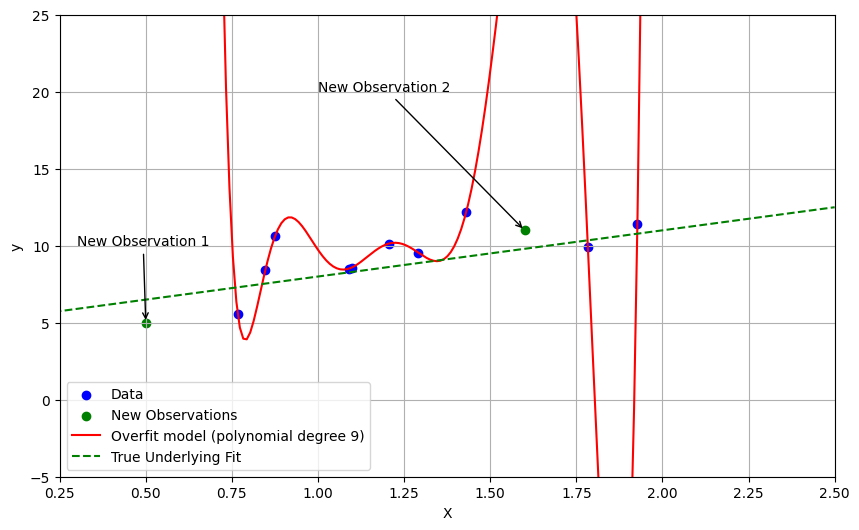

In [4]:
# Generate synthetic data with noise
np.random.seed(0)
X = 2 * np.random.rand(10, 1)
y = 5 + 3 * X + np.random.randn(10, 1) * 2  # Introduce noise with higher variance

# True underlying relationship
X_true = np.linspace(0, 2.5, 100).reshape(-1, 1)
y_true = 5 + 3 * X_true

# Fit final polynomial regression (degree 9)
degree = 9
theta = np.polyfit(X.squeeze(), y.squeeze(), degree)
X_fit = np.linspace(0, 2.5, 250).reshape(-1, 1)
y_pred = np.polyval(theta, X_fit)

# Plot the new observation along with the final polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data")
plt.scatter([0.5, 1.6], [5, 11], color="green", label="New Observations")
plt.plot(X_fit, y_pred, color="red", label="Overfit model (polynomial degree 9)")

# Plot the true underlying relationship
plt.plot(X_true, y_true, color="green", label="True Underlying Fit", linestyle="--")

# Add arrows and text for new observations
plt.annotate(
    "New Observation 1",
    xy=(0.5, 5),
    xytext=(0.3, 10),
    arrowprops=dict(facecolor="green", arrowstyle="->"),
)
plt.annotate(
    "New Observation 2",
    xy=(1.6, 11),
    xytext=(1.00, 20),
    arrowprops=dict(facecolor="green", arrowstyle="->"),
)

# plt.title('Final Polynomial Fit with New Observations')
plt.xlabel("X")
plt.ylabel("y")
plt.xlim(0.25, 2.5)
plt.ylim(-5, 25)  # Adjusted y-axis limit to accommodate higher variance
plt.legend()
plt.grid(True)

# plt.savefig('overfit_new_data_points.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/459941646.py:13: RankWarning: Polyfit may be poorly conditioned
  theta = np.polyfit(X.squeeze(), y.squeeze(), n - 1)


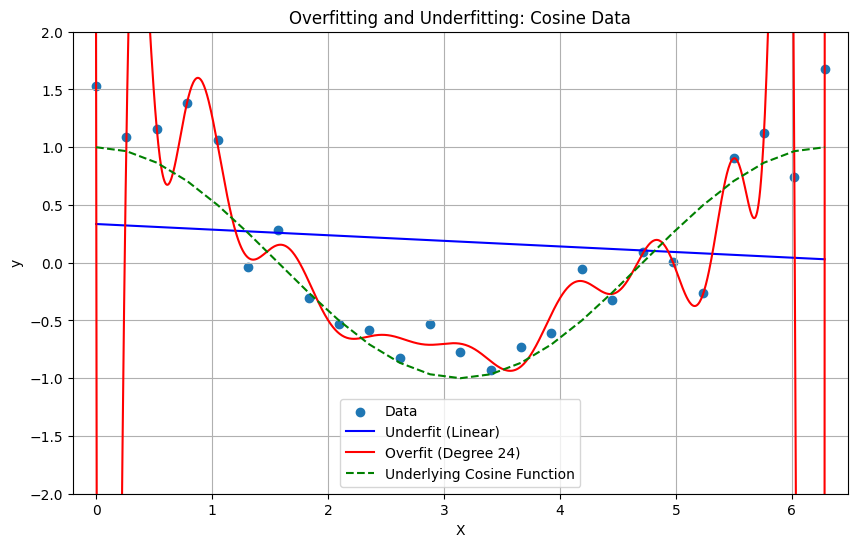

In [5]:
# Generate synthetic data from a cosine function
np.random.seed(0)
X = np.linspace(0, 2 * np.pi, 25)
y = np.cos(X) + np.random.normal(0, 0.3, size=X.shape)

# Fit a linear line to the data
coefficients = np.polyfit(X, y, deg=1)
linear_fit = np.poly1d(coefficients)

# Fit a polynomial of degree n-1 to the data (to overfit)
n = len(y)  # Degree of polynomial
# Fit final polynomial regression (degree 9)
theta = np.polyfit(X.squeeze(), y.squeeze(), n - 1)
X_fit = np.linspace(-0.2, max(X) + 0.2, 1000).reshape(-1, 1)
y_pred = np.polyval(theta, X_fit)


# Plot the data, the linear fit, the overfit polynomial, and the underlying cosine function
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data")
plt.plot(X, linear_fit(X), color="blue", label="Underfit (Linear)")
# plt.plot(X, overfit_polynomial(X), color='red', label=f'Overfit (Degree {n-1})')
plt.plot(X_fit, y_pred, color="red", label=f"Overfit (Degree {n-1})")
# plt.plot(X_poly, y_pred_ridge, color='orange', label=f'Ridge (Degree {n-1})')
plt.plot(
    X, np.cos(X), color="green", linestyle="--", label="Underlying Cosine Function"
)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Overfitting and Underfitting: Cosine Data")
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.xlim(0 - 0.2, max(X) + 0.2)
# plt.savefig('underfit_overfit_cos.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

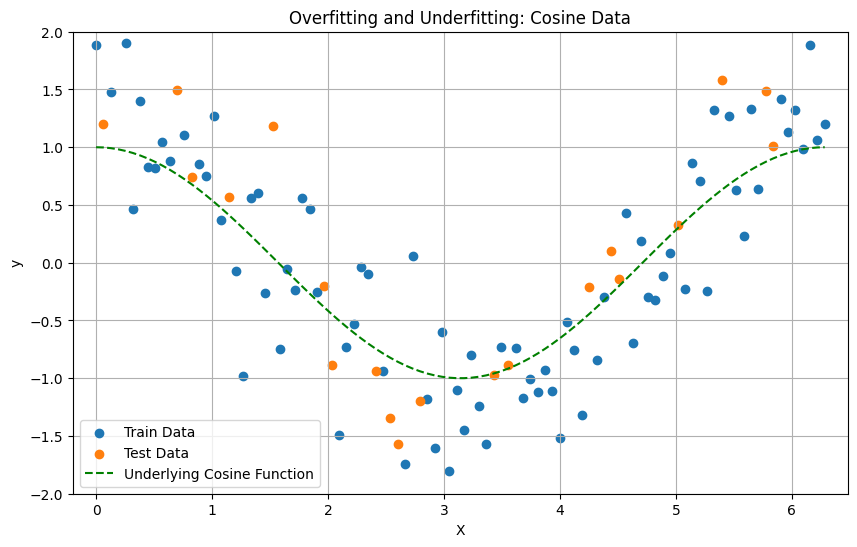

In [6]:
# Generate synthetic data from a cosine function
np.random.seed(0)
X = np.linspace(0, 2 * np.pi, 100)
y = np.cos(X) + np.random.normal(0, 0.5, size=X.shape)

shuffled_order = np.random.permutation(np.arange(len(X)))
train_idx = shuffled_order[0 : int(len(shuffled_order) * 0.8)]
test_idx = shuffled_order[int(len(shuffled_order) * 0.8) :]

# Plot the data, the linear fit, the overfit polynomial, and the underlying cosine function
plt.figure(figsize=(10, 6))
plt.scatter(X[train_idx], y[train_idx], label="Train Data")
plt.scatter(X[test_idx], y[test_idx], label="Test Data")
plt.plot(
    X, np.cos(X), color="green", linestyle="--", label="Underlying Cosine Function"
)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Overfitting and Underfitting: Cosine Data")
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.xlim(0 - 0.2, max(X) + 0.2)
# plt.savefig('underfit_overfit_cos.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

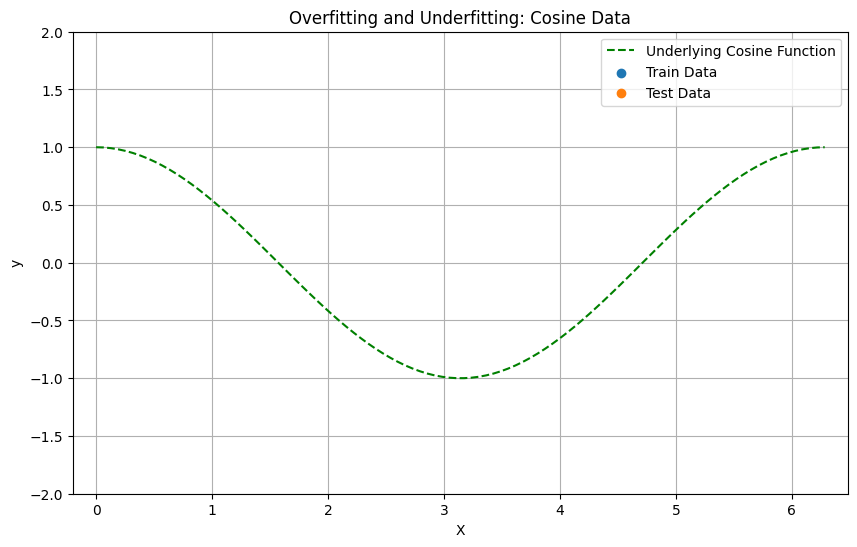

In [7]:
# Generate synthetic data from a cosine function
np.random.seed(0)
X = np.linspace(0, 2 * np.pi, 100)
y = np.cos(X) + np.random.normal(0, 0.5, size=X.shape)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Overfitting and Underfitting: Cosine Data")
ax.set_ylim(-2, 2)
ax.set_xlim(0 - 0.2, max(X) + 0.2)
ax.plot(X, np.cos(X), color="green", linestyle="--", label="Underlying Cosine Function")
train_scatter = ax.scatter([], [], label="Train Data")
test_scatter = ax.scatter([], [], label="Test Data")
ax.legend()
ax.grid(True)


# Function to update the plot for each frame of the animation
def update(frame):
    ax.clear()
    ax.plot(
        X, np.cos(X), color="green", linestyle="--", label="Underlying Cosine Function"
    )

    # Shuffle the indices to create a random train-test split
    shuffled_order = np.random.permutation(np.arange(len(X)))
    train_idx = shuffled_order[0 : int(len(shuffled_order) * 0.8)]
    test_idx = shuffled_order[int(len(shuffled_order) * 0.8) :]

    # Plot the train and test data points
    ax.scatter(X[train_idx], y[train_idx], label="Train Data")
    ax.scatter(X[test_idx], y[test_idx], label="Test Data")

    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_title("Different Train-Test Splits")
    ax.set_ylim(-2, 2)
    ax.set_xlim(0 - 0.2, max(X) + 0.2)
    ax.legend()
    ax.grid(True)


# Create animation
ani = FuncAnimation(fig, update, frames=10, interval=1000, repeat=False)
# ani.save('train_test_split_cos_animation.gif', writer='imagemagick', dpi=150)
plt.show()

In [8]:
HTML(ani.to_html5_video())

## Intuition behind regularized regression

<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:67: SyntaxWarning: invalid escape sequence '\l'
<>:72: SyntaxWarning: invalid escape sequence '\l'
<>:81: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:67: SyntaxWarning: invalid escape sequence '\l'
<>:72: SyntaxWarning: invalid escape sequence '\l'
<>:81: SyntaxWarning: invalid escape sequence '\l'
/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/1543299208.py:51: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_xlabel("$\lambda$")
/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/1543299208.py:67: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_title("Regression Coefficients vs. $\lambda$")
/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/1543299208.py:72: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_xlabel("$\lambda$")
/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/1543299208.py:81: SyntaxWarning: inva

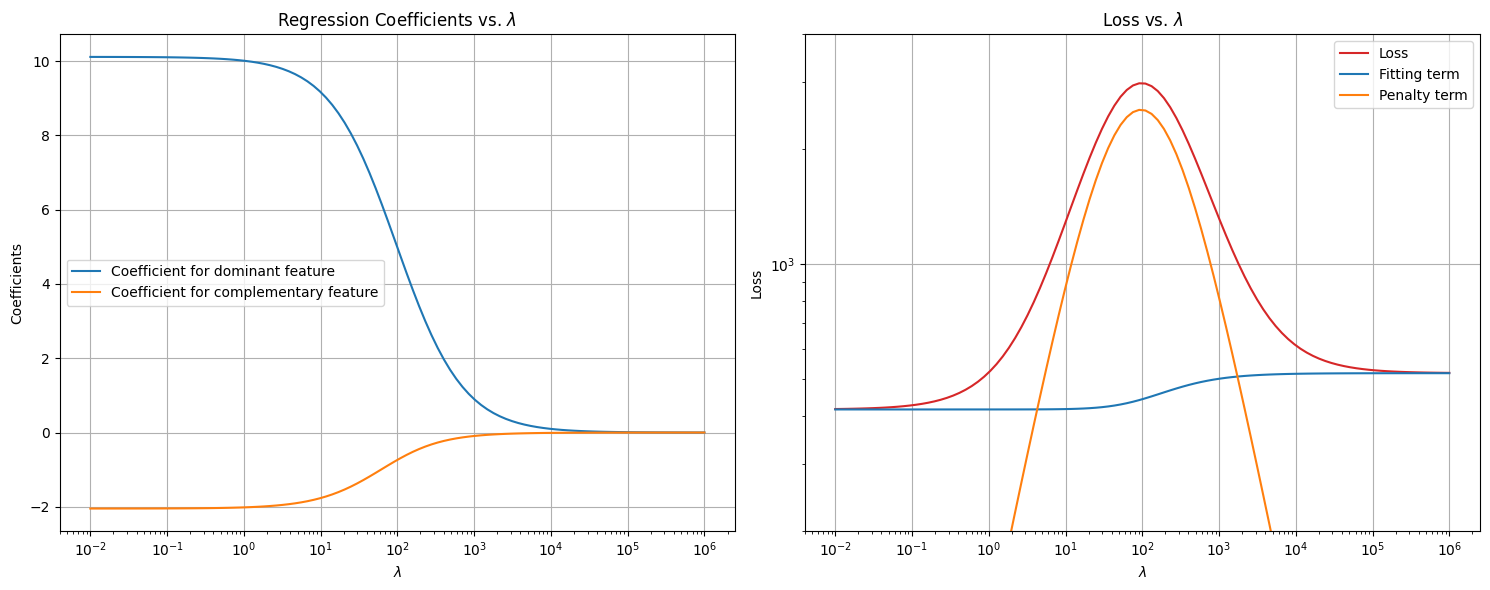

In [9]:
# Generate synthetic data
np.random.seed(0)
X_dominant = np.random.randn(100, 1)  # Dominant feature
X_complementary = np.random.randn(100, 1)  # Complementary feature
X = np.concatenate([X_dominant, X_complementary], axis=1)
y = (
    20 + 10 * X[:, 0] - 2 * X[:, 1] + np.random.randn(100) * 0.5
)  # True relationship with some noise
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Define range of alpha values
alphas = np.logspace(-2, 6, 100)  # Using logarithmic scale for alpha

# Initialize arrays to store coefficient values for Ridge
ridge_coefficients_0 = []
ridge_coefficients_1 = []
losses = []
fitting_loss = []
penalty_loss = []

# Initialize arrays to store coefficient values for Ridge
p_ridge_coefficients_0 = []
p_ridge_coefficients_1 = []
p_losses = []
p_fitting_loss = []
p_penalty_loss = []

# Iterate over alpha values
for alpha in alphas:
    # Compute closed-form solution for Ridge Regression
    m, n = X.shape
    I = np.eye(n)  # No bias
    theta_closed_form = (
        np.linalg.inv(X_scaled.T.dot(X_scaled) + alpha * I).dot(X_scaled.T).dot(y)
    )

    ridge_coefficients_0.append(theta_closed_form[0])
    ridge_coefficients_1.append(theta_closed_form[1])
    # Compute loss
    y_pred = X_scaled.dot(theta_closed_form)
    loss = np.mean((y - y_pred) ** 2) + alpha * np.sum(theta_closed_form**2)
    losses.append(loss)
    fitting_loss.append(np.mean((y - y_pred) ** 2))
    penalty_loss.append(alpha * np.sum(theta_closed_form**2))


# Plot the coefficients as a function of alpha
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Ridge coefficients
ax1.set_xlabel("$\lambda$")
ax1.set_ylabel("Coefficients")
ax1.plot(
    alphas,
    ridge_coefficients_0,
    label="Coefficient for dominant feature",
    color="tab:blue",
)
ax1.plot(
    alphas,
    ridge_coefficients_1,
    label="Coefficient for complementary feature",
    color="tab:orange",
)
ax1.tick_params(axis="y")
ax1.set_xscale("log")  # Using logarithmic scale for alpha
ax1.set_title("Regression Coefficients vs. $\lambda$")
ax1.grid(True)
ax1.legend(loc="center left")

# Plot loss
ax2.set_xlabel("$\lambda$")
ax2.set_ylabel("Loss")
ax2.plot(alphas, losses, label="Loss", color="tab:red")
ax2.plot(alphas, fitting_loss, label="Fitting term", color="tab:blue")
ax2.plot(alphas, penalty_loss, label="Penalty term", color="tab:orange")
ax2.tick_params(axis="y")
ax2.set_xscale("log")  # Using logarithmic scale for alpha
ax2.set_ylim(200, 4000)
ax2.set_yscale("log")  # Using logarithmic scale for loss
ax2.set_title("Loss vs. $\lambda$")
ax2.grid(True)
ax2.legend()

# Add legend
fig.tight_layout()
# plt.savefig('synthetic_example_ridge_dominant_complementary_increasing_lambda.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

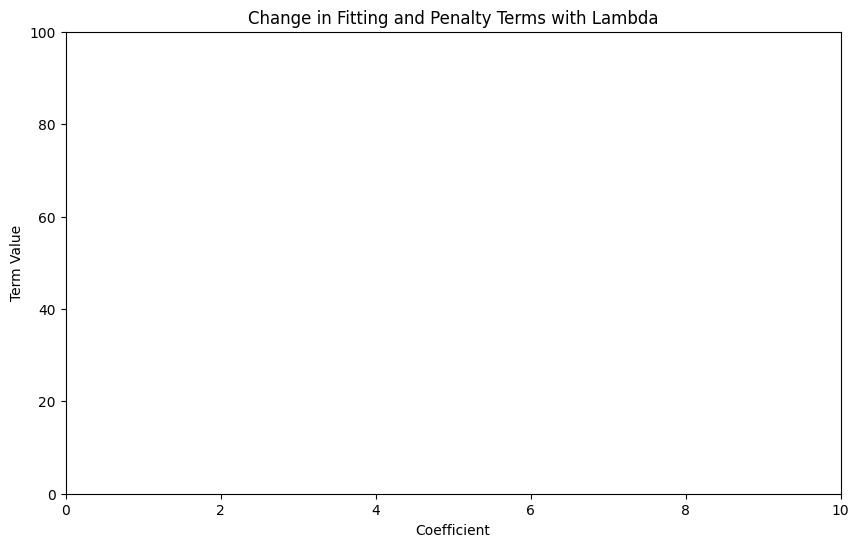

In [10]:
# Generate a single observation with one parameter
x = 2  # Single parameter
y = 10  # True y value

# Define lambda values
lambdas = np.linspace(0, 2.0, 50)  # Range of lambda values

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize empty lines for plotting
(fitting_line,) = ax.plot([], [], color="red", label="Fitting Term")
(penalty_line,) = ax.plot([], [], color="blue", label="Penalty Term")
(total_cost_line,) = ax.plot([], [], color="orange", label="Total Cost")

# Initialize text annotation
text = ax.text(0.5, 0.9, "", transform=ax.transAxes, ha="right", va="top", fontsize=14)

# Set up plot parameters
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Term Value")
ax.set_title("Change in Fitting and Penalty Terms with Lambda")


# Define initialization function
def init():
    fitting_line.set_data([], [])
    penalty_line.set_data([], [])
    total_cost_line.set_data([], [])
    text.set_text("")
    return fitting_line, penalty_line, total_cost_line, text


# Define update function for animation
def update(lambda_):
    # Fix lambda
    lambda_fixed = lambda_

    # Initialize arrays to store fitting term, penalty term, and total cost values
    fitting_term_values = []
    penalty_term_values = []
    total_cost_values = []

    # Calculate fitting term, penalty term, and total cost for each coefficient
    for coef in np.linspace(0, 10, 100):  # Range of coefficient values
        # Fitting term
        fitting_term = (y - x * coef) ** 2
        fitting_term_values.append(fitting_term)

        # Penalty term
        penalty_term = lambda_fixed * (coef**2)
        penalty_term_values.append(penalty_term)

        # Total cost
        total_cost = fitting_term + penalty_term
        total_cost_values.append(total_cost)

    fitting_line.set_data(np.linspace(0, 10, 100), fitting_term_values)
    penalty_line.set_data(np.linspace(0, 10, 100), penalty_term_values)
    total_cost_line.set_data(np.linspace(0, 10, 100), total_cost_values)

    # Update text annotation with the current lambda value
    text.set_text(rf"$\lambda$ = {lambda_:.2f}")

    return fitting_line, penalty_line, total_cost_line, text


# Create animation
ani = FuncAnimation(fig, update, frames=lambdas, init_func=init, blit=True)
# ani.save('ridge_coef_dist_changing_lambda.gif', writer='imagemagick', dpi=150)
plt.show()

In [11]:
HTML(ani.to_html5_video())

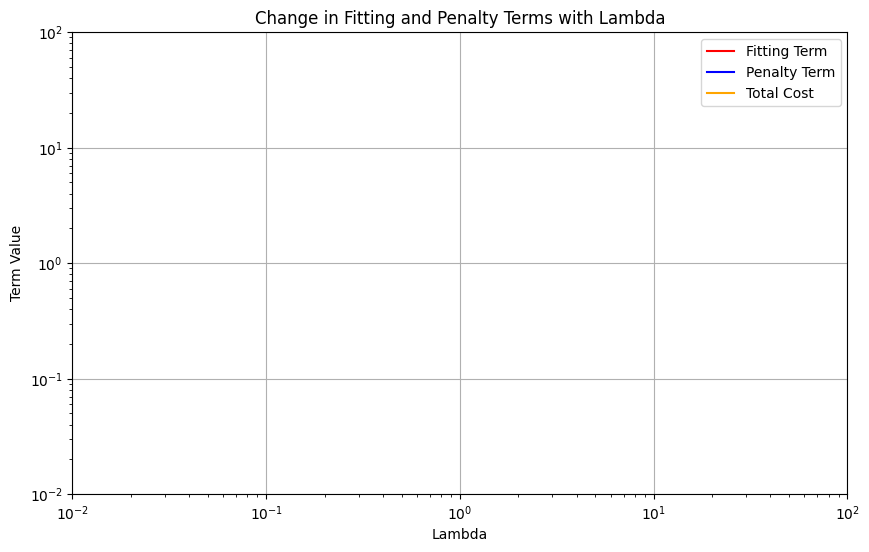

In [12]:
# Generate a single observation with one parameter
x = 2  # Single parameter
y = 10  # True y value

# Define lambda values
lambdas = np.logspace(-2, 2, 100)  # Range of lambda values

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize empty lines for plotting
(fitting_line,) = ax.plot([], [], color="red", label="Fitting Term")
(penalty_line,) = ax.plot([], [], color="blue", label="Penalty Term")
(total_cost_line,) = ax.plot([], [], color="orange", label="Total Cost")

# Set up plot parameters
ax.set_xlim(lambdas[0], lambdas[-1])
ax.set_ylim(0.01, 100)
ax.set_xlabel("Lambda")
ax.set_ylabel("Term Value")
ax.set_title("Change in Fitting and Penalty Terms with Lambda")
ax.set_xscale("log")
ax.set_yscale("log")  # Log scale for y-axis
ax.legend()
ax.grid(True)

# Initialize text annotation
text = ax.text(0.5, 0.9, "", transform=ax.transAxes, ha="center", fontsize=14)


# Define initialization function
def init():
    fitting_line.set_data([], [])
    penalty_line.set_data([], [])
    total_cost_line.set_data([], [])
    text.set_text("")
    return fitting_line, penalty_line, total_cost_line, text


# Define update function for animation
def update(coef):
    # Calculate fitting term, penalty term, and total cost for the given coefficient
    fitting_term = (y - x * coef) ** 2
    penalty_term = lambdas * (coef**2)
    total_cost = fitting_term + penalty_term

    # Update plot data
    fitting_line.set_data(lambdas, fitting_term)
    penalty_line.set_data(lambdas, penalty_term)
    total_cost_line.set_data(lambdas, total_cost)

    # Update text annotation
    text.set_text(rf"$\beta$ = {coef:.2f}" + "\n" + r"optimal $\beta$ = 5")

    return fitting_line, penalty_line, total_cost_line, text


# Create animation
ani = FuncAnimation(
    fig, update, frames=np.linspace(0, 10, 250), init_func=init, blit=True, interval=100
)
# ani.save('ridge_coef_dist_changing_coefficient.gif', writer='imagemagick', dpi=150)

# Show the animation
plt.show()

In [13]:
HTML(ani.to_html5_video())

/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/4073252173.py:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  fitting_line.set_data(lambdas, fitting_term)


## Training a Ridge Regression model from scratch

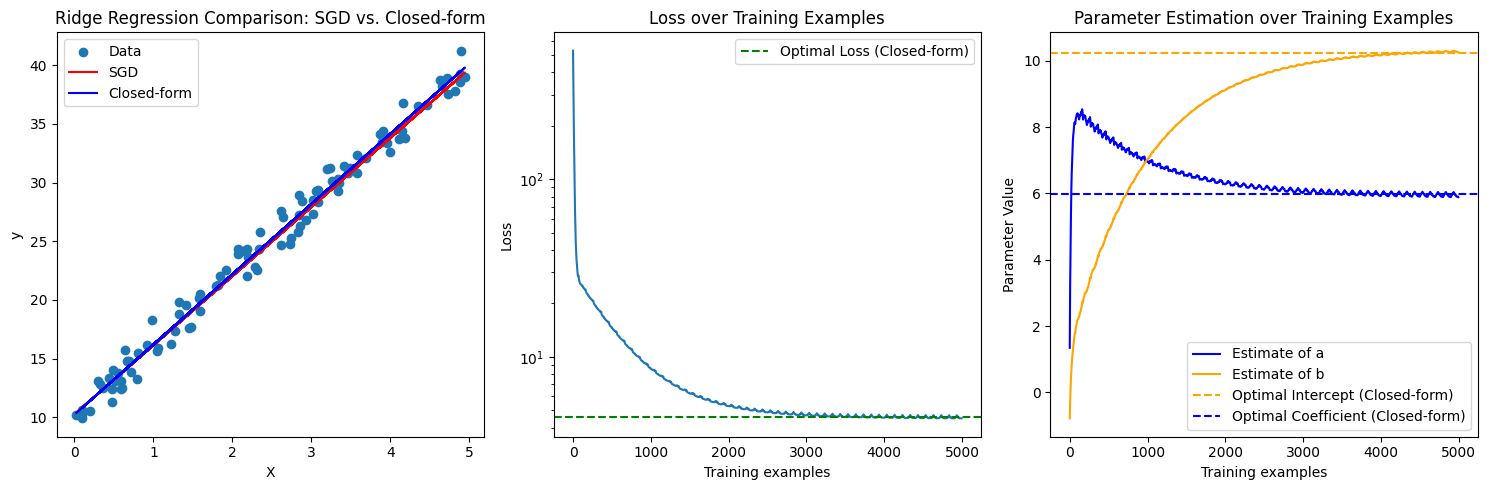

SGD - Intercept (b): 10.267202879722937
SGD - Coefficient (a): [5.88967082]
Closed-form - Intercept (b): 10.228959336358148
Closed-form - Coefficient (a): 5.984506992595849


In [14]:
# Generate synthetic data
np.random.seed(0)
# Random values between 0 and 5
X = 5 * np.random.rand(100, 1)
# Underlying model 10 + 6x plus random noise
y = 10 + 6 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Compute closed-form solution for Ridge Regression
lambda_ = 0.1  # Regularization parameter
m, n = X_b.shape  # Number of rows and columns of the design matrix X
I = np.eye(n)  # Identity matrix
# We do not want to penalize the intercept (bias) term so we set the first
# cell in the identiy matrix to 0
I[0][0] = 0
# Equation for closed-form solution
theta_closed_form = np.linalg.inv(X_b.T.dot(X_b) + lambda_ * I).dot(X_b.T).dot(y)

# Optimal loss level according to closed-form solution
optimal_loss = np.mean((y - X_b.dot(theta_closed_form)) ** 2) + lambda_ * (
    theta_closed_form[1][0] ** 2
)


# Define function for computing gradients
def compute_gradients(X, y, a, b, lambda_, batch_size):
    gradients_a = (
        -2 / batch_size * X.T.dot(y - (a * X + b)) + 2 / batch_size * lambda_ * a
    )
    gradient_b = -2 / batch_size * np.sum(y - (a * X + b))
    return gradients_a, gradient_b


# Train Ridge Regression model with Stochastic Gradient Descent
def ridge_regression_sgd(X, y, alpha, lambda_, n_iterations, batch_size):
    a = np.random.randn(1)  # Random initialization of parameter a
    b = np.random.randn(1)  # Random initialization of parameter b
    losses = []  # Keep track of loss as we progress
    estimates_a = []  # Keep track of the estimate of a as we progress
    estimates_b = []  # Keep track of the estimate of b as we progress

    # Shuffle the training examples every epoch
    m = len(X)
    indices = np.random.randint(
        m, size=batch_size
    )  # Select random indices for mini-batch
    iterations_per_epoch = m // batch_size  # Number of iterations per epoch

    for iteration in range(n_iterations):
        # Reshuffle the random indices for mini-batch for each epoch
        if iteration % iterations_per_epoch == 0:
            indices = np.random.randint(m, size=batch_size)

        # Mini-batch offset
        idx_from, idx_to = (batch_size * iteration % m), (
            batch_size * iteration % m
        ) + batch_size
        X_batch = X[idx_from:idx_to]
        y_batch = y[idx_from:idx_to]

        # Compute the gradients
        gradients_a, gradient_b = compute_gradients(
            X_batch, y_batch, a, b, lambda_, batch_size
        )

        # Update step
        a = a - alpha * gradients_a  # Update parameter a
        b = b - alpha * gradient_b  # Update parameter b

        # Compute loss at each iteration
        loss = np.mean((y - (a * X + b)) ** 2) + lambda_ * (a**2)

        # Store the current loss and estimates of a and b
        losses.append(loss)
        estimates_a.append(a[0])
        estimates_b.append(b[0])
    return a, b, losses, estimates_a, estimates_b


# Hyperparameters
alpha = 0.01  # Learning rate
batch_size = 5  # Mini-batch size
n_iterations = 1000  # Number of iterations (update steps)

# Train Ridge Regression model
a_sgd, b_sgd, losses, estimates_a, estimates_b = ridge_regression_sgd(
    X, y, alpha, lambda_, n_iterations, batch_size
)

# Plot the data and the fitted lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# First subplot: Data and Fitted lines
axes[0].scatter(X, y, label="Data")
axes[0].plot(
    X, X_b.dot(np.array([b_sgd[0], a_sgd[0].squeeze()])), color="red", label="SGD"
)
axes[0].plot(X, X_b.dot(theta_closed_form), color="blue", label="Closed-form")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("Ridge Regression Comparison: SGD vs. Closed-form")
axes[0].legend()

# Second subplot: Loss over Iterations
axes[1].plot(np.arange(len(losses)) * batch_size, np.array(losses).squeeze())
axes[1].axhline(
    y=optimal_loss, color="green", linestyle="--", label="Optimal Loss (Closed-form)"
)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("Loss")
axes[1].set_yscale("log")
axes[1].set_title("Loss over Training Examples")
axes[1].legend()

# Third subplot: Parameter Estimation over Iterations
axes[2].plot(
    np.arange(len(losses)) * batch_size,
    estimates_a,
    label="Estimate of a",
    color="blue",
)
axes[2].plot(
    np.arange(len(losses)) * batch_size,
    estimates_b,
    label="Estimate of b",
    color="orange",
)
axes[2].axhline(
    y=theta_closed_form[0][0],
    color="orange",
    linestyle="--",
    label="Optimal Intercept (Closed-form)",
)
axes[2].axhline(
    y=theta_closed_form[1][0],
    color="blue",
    linestyle="--",
    label="Optimal Coefficient (Closed-form)",
)
axes[2].set_xlabel("Training examples")
axes[2].set_ylabel("Parameter Value")
axes[2].set_title("Parameter Estimation over Training Examples")
axes[2].legend()

plt.tight_layout()
plt.show()

# Print the parameters
print("SGD - Intercept (b):", b_sgd[0])
print("SGD - Coefficient (a):", a_sgd[0])
print("Closed-form - Intercept (b):", theta_closed_form[0][0])
print("Closed-form - Coefficient (a):", theta_closed_form[1][0])

/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/3058481919.py:139: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(intercept, coefficient)


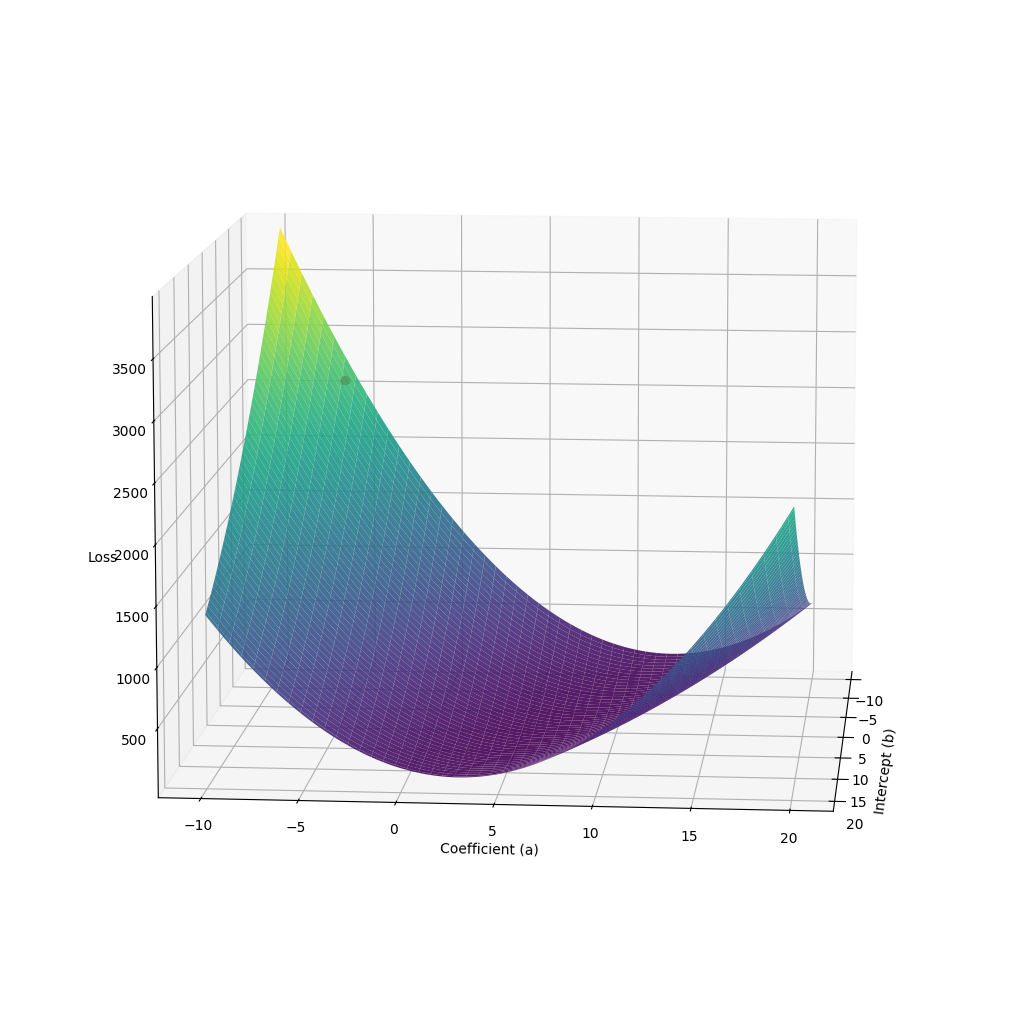

SGD - Intercept (b): 10.232045213371038
SGD - Coefficient (a): 5.901441641908268
Final Loss: [[4.52784536]]
Closed-form - Intercept (b): 10.228959336358148
Closed-form - Coefficient (a): 5.984506992595849


In [15]:
# Generate synthetic data
np.random.seed(0)
# Random values between 0 and 5
X = 5 * np.random.rand(100, 1)
# Underlying model 10 + 6x plus random noise
y = 10 + 6 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Compute closed-form solution for Ridge Regression
lambda_ = 0.1  # Regularization parameter
m, n = X_b.shape  # Number of rows and columns of the design matrix X
I = np.eye(n)  # Identity matrix
# We do not want to penalize the intercept (bias) term so we set the first
# cell in the identiy matrix to 0
I[0][0] = 0
# Equation for closed-form solution
theta_closed_form = np.linalg.inv(X_b.T.dot(X_b) + lambda_ * I).dot(X_b.T).dot(y)

# Optimal loss level according to closed-form solution
optimal_loss = np.mean((y - X_b.dot(theta_closed_form)) ** 2) + lambda_ * (
    theta_closed_form[1][0] ** 2
)


# Define function for computing gradients
def compute_gradients(X, y, a, b, lambda_, batch_size):
    gradients_a = (
        -2 / batch_size * X.T.dot(y - (a * X + b)) + 2 / batch_size * lambda_ * a
    )
    gradient_b = -2 / batch_size * np.sum(y - (a * X + b))
    return gradients_a, gradient_b


# Train Ridge Regression model with Stochastic Gradient Descent
def ridge_regression_sgd(
    X, y, alpha, lambda_, n_iterations, batch_size, init_a, init_b
):
    a = init_a  # Initialize parameter a
    b = init_b  # Initialize parameter b
    line_params = []
    losses = []
    param_trace = []  # Store parameter values for trace
    losses = []  # Keep track of loss as we progress
    estimates_a = []  # Keep track of the estimate of a as we progress
    estimates_b = []  # Keep track of the estimate of b as we progress

    # Shuffle the training examples every epoch
    m = len(X)
    indices = np.random.randint(
        m, size=batch_size
    )  # Select random indices for mini-batch
    iterations_per_epoch = m // batch_size  # Number of iterations per epoch

    for iteration in range(n_iterations):
        # Reshuffle the random indices for mini-batch for each epoch
        if iteration % iterations_per_epoch == 0:
            indices = np.random.randint(m, size=batch_size)

        # Mini-batch offset
        idx_from, idx_to = (batch_size * iteration % m), (
            batch_size * iteration % m
        ) + batch_size
        X_batch = X[idx_from:idx_to]
        y_batch = y[idx_from:idx_to]

        # Compute the gradients
        gradients_a, gradient_b = compute_gradients(
            X_batch, y_batch, a, b, lambda_, batch_size
        )

        # Update step
        a = a - alpha * gradients_a  # Update parameter a
        b = b - alpha * gradient_b  # Update parameter b

        # Compute loss at each iteration
        loss = np.mean((y - (a * X + b)) ** 2) + lambda_ * (a**2)

        # Store the current loss and estimates of a and b
        losses.append(loss)
        estimates_a.append(a[0])
        estimates_b.append(b)
        line_params.append((b, a[0][0]))
        losses.append(loss)
        param_trace.append((b, a[0][0], loss))  # Store parameter values
    return line_params, losses, param_trace


# Hyperparameters
alpha = 0.01  # Learning rate
batch_size = 5  # Mini-batch size
n_iterations = 1000  # Number of iterations (update steps)

# Initialize parameters
init_a = -10
init_b = -10

# Train Ridge Regression model
line_params, losses, param_trace = ridge_regression_sgd(
    X, y, alpha, lambda_, n_iterations, batch_size, init_a, init_b
)

# Plot 3D Loss surface
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax = fig.add_subplot(111, projection="3d")

# Create grid for parameters
b_vals = np.linspace(-10, 20, 100)
a_vals = np.linspace(-10, 20, 100)
b_vals, a_vals = np.meshgrid(b_vals, a_vals)

# Compute loss for each combination of parameters
loss_surface = np.zeros_like(b_vals)
for i in range(len(b_vals)):
    for j in range(len(a_vals)):
        loss_surface[i, j] = np.mean(
            (y - (a_vals[i, j] * X + b_vals[i, j])) ** 2
        ) + lambda_ * (a_vals[i, j] ** 2 + b_vals[i, j] ** 2)

# Plot loss surface
ax.plot_surface(b_vals, a_vals, loss_surface, cmap="viridis", alpha=0.9)
ax.set_xlabel("Intercept (b)")
ax.set_ylabel("Coefficient (a)")
ax.set_zlabel("Loss")
# ax.set_title('Ridge Regression Loss Surface')

# Initialize line for animation
(line,) = ax.plot([], [], [], marker="o", color="r", linestyle="")
(trace_line,) = ax.plot([], [], [], color="b", linestyle="-", alpha=1.0)


# Update function for animation
def update(frame):
    used_frame = frame * 10
    intercept, coefficient = line_params[used_frame]
    loss = losses[used_frame]
    line.set_data(intercept, coefficient)
    line.set_3d_properties(loss)

    # Update trace line
    # print(used_frame)
    if used_frame:
        trace_b, trace_a, trace_loss = zip(
            *param_trace[:used_frame]
        )  # Extract trace values
        trace_line.set_data(trace_b, trace_a)
        trace_line.set_3d_properties(trace_loss)  # Set z-data to loss values

    return line, trace_line


# Create animation
ax.view_init(10, 5)
ani = FuncAnimation(fig, update, frames=len(line_params) // 10, interval=100, blit=True)
# ani.save('ridge_training_example_sgd_3d_surface.gif', writer='imagemagick', dpi=150)
plt.show()

# Print the parameters
print("SGD - Intercept (b):", line_params[-1][0])
print("SGD - Coefficient (a):", line_params[-1][1])
print("Final Loss:", losses[-1])
print("Closed-form - Intercept (b):", theta_closed_form[0][0])
print("Closed-form - Coefficient (a):", theta_closed_form[1][0])

In [16]:
HTML(ani.to_html5_video())

/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/3058481919.py:139: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(intercept, coefficient)


## Introducing the Lagrangian form and the Lagrange multiplier

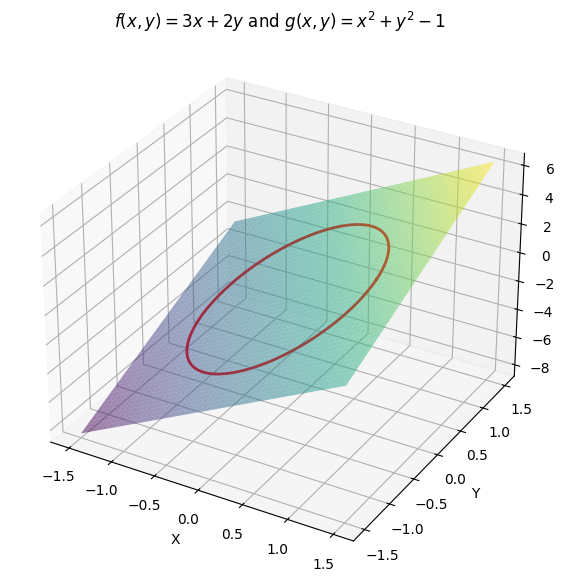

In [17]:
# Define the function f(x, y) = 3x + 2y
def f(x, y):
    return 3 * x + 2 * y - 1


# Define the constraint function g(x, y) = x^2 + y^2 = 1
def g(x, y):
    return x**2 + y**2


# Generate x and y values for plotting
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for the surface plot
Z = f(X, Y)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)

# Plot the constraint region g(x, y) = 1 projected onto the xy-plane
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax.plot(
    x_circle,
    y_circle,
    zs=f(x_circle, y_circle),
    zdir="z",
    color="red",
    alpha=1.0,
    linewidth=2,
)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title("$f(x, y) = 3x + 2y$ and $g(x, y) = x^2 + y^2 - 1$")

# plt.savefig('lagrangian_f1_g1_overview.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

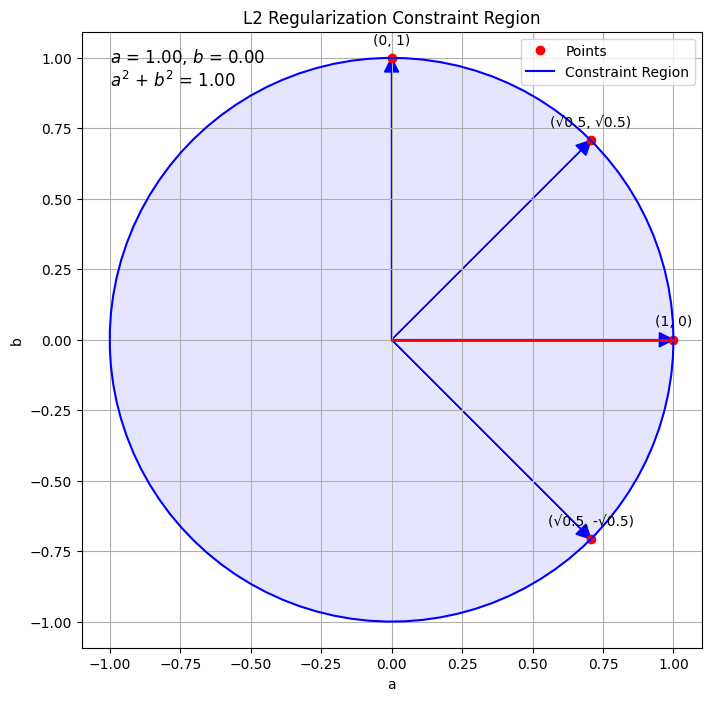

In [18]:
# Define points
points = np.array(
    [[np.sqrt(0.5), np.sqrt(0.5)], [1, 0], [0, 1], [np.sqrt(0.5), -np.sqrt(0.5)]]
)

# Define circle parameters
theta = np.linspace(0, 2 * np.pi, 100)
r = 1

# Calculate circle points
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)

# Plot points and circle
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.plot(points[:, 0], points[:, 1], "ro", label="Points")
ax.plot(x_circle, y_circle, "b-", label="Constraint Region")
ax.fill(x_circle, y_circle, "b-", alpha=0.1)

# Plot vectors from origin to points
for point in points:
    ax.arrow(
        0,
        0,
        point[0],
        point[1],
        head_width=0.05,
        head_length=0.05,
        fc="b",
        ec="b",
        length_includes_head=True,
    )

# Annotate points
for i, txt in enumerate(["(√0.5, √0.5)", "(1, 0)", "(0, 1)", "(√0.5, -√0.5)"]):
    ax.annotate(
        txt,
        (points[i, 0], points[i, 1]),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )

# Initialize the vector
(vector,) = ax.plot([], [], "r-", lw=2)

# Initialize text object for displaying current values of a and b
text = ax.text(-1.0, 0.9, "", fontsize=12, color="black")


# Function to update the vector's position
def update(frame):
    x = np.cos(frame)  # Calculate x-coordinate
    y = np.sin(frame)  # Calculate y-coordinate
    vector.set_data([0, x], [0, y])  # Update vector's position

    # Update text with current values of a and b
    text.set_text(
        rf"$a$ = {x:.2f}, $b$ = {y:.2f}" + "\n" + rf"$a^2$ + $b^2$ = {x**2 + y**2:.2f}"
    )

    return vector, text


# Create animation
ani = FuncAnimation(
    fig, update, frames=np.linspace(0, 2 * np.pi, 360), blit=True, interval=50
)

plt.xlabel("a")
plt.ylabel("b")
plt.title("L2 Regularization Constraint Region")
plt.axis("equal")
plt.legend()
plt.grid(True)
# ani.save('constraint_region_l2_circle_animation.gif', writer='imagemagick', dpi=150, fps=30)
plt.show()

In [19]:
HTML(ani.to_html5_video())

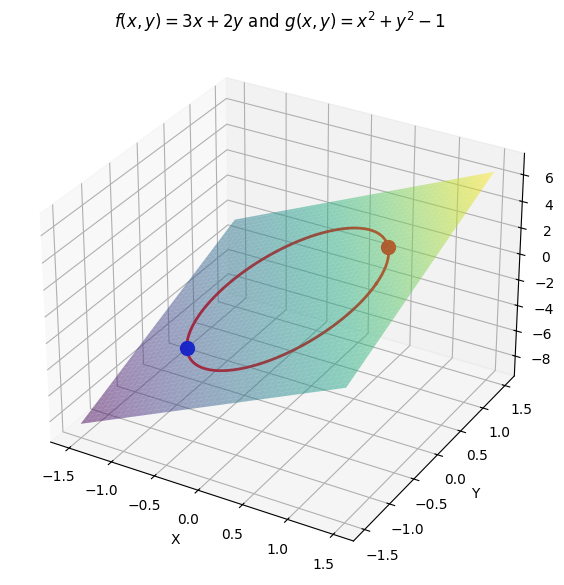

In [20]:
# Define the function f(x, y) = 3x + 2y
def f(x, y):
    return 3 * x + 2 * y - 1


# Define the constraint function g(x, y) = x^2 + y^2 = 1
def g(x, y):
    return x**2 + y**2


# Generate x and y values for plotting
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for the surface plot
Z = f(X, Y)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)

# Plot the constraint region g(x, y) = 1 projected onto the xy-plane
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax.plot(
    x_circle,
    y_circle,
    zs=f(x_circle, y_circle),
    zdir="z",
    color="red",
    alpha=1.0,
    linewidth=2,
)

critical_point1 = (3 / np.sqrt(13), 2 / np.sqrt(13))
critical_point2 = (-3 / np.sqrt(13), -2 / np.sqrt(13))
ax.scatter(
    critical_point1[0], critical_point1[1], f(*critical_point1), color="red", s=100
)
ax.scatter(
    critical_point2[0], critical_point2[1], f(*critical_point2), color="blue", s=100
)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title("$f(x, y) = 3x + 2y$ and $g(x, y) = x^2 + y^2 - 1$")

# plt.savefig('lagrangian_f1_g1_overview_critical_points.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

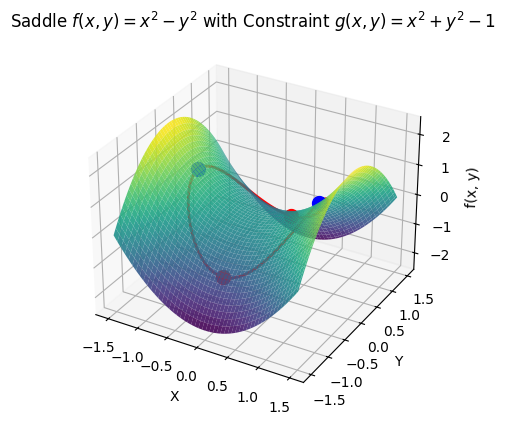

In [21]:
# Define the function f(x, y)
def f(x, y):
    # return x**3 - 3*x*y**2
    return x**2 - y**2


# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1


# Create a grid of x and y values
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for the surface plot
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()

# Plot the 3D surface
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9)

# Initialize the line for the constraint path
(line,) = ax.plot(
    x_circle,
    y_circle,
    zs=f(x_circle, y_circle),
    zdir="z",
    color="red",
    alpha=1.0,
    linewidth=2,
)

critical_point1 = [(0, -1), (0, 1)]
critical_point2 = [(-1, 0), (1, 0)]
ax.scatter(
    critical_point1[0][0],
    critical_point1[0][1],
    f(*critical_point1[0]),
    color="red",
    s=100,
)
ax.scatter(
    critical_point1[1][0],
    critical_point1[1][1],
    f(*critical_point1[1]),
    color="red",
    s=100,
)
ax.scatter(
    critical_point2[0][0],
    critical_point2[0][1],
    f(*critical_point2[0]),
    color="blue",
    s=100,
)
ax.scatter(
    critical_point2[1][0],
    critical_point2[1][1],
    f(*critical_point2[1]),
    color="blue",
    s=100,
)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title("Saddle $f(x, y) = x^2 - y^2$ with Constraint $g(x, y) = x^2 + y^2 - 1$")

# plt.savefig('lagrangian_saddle_critical_points.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

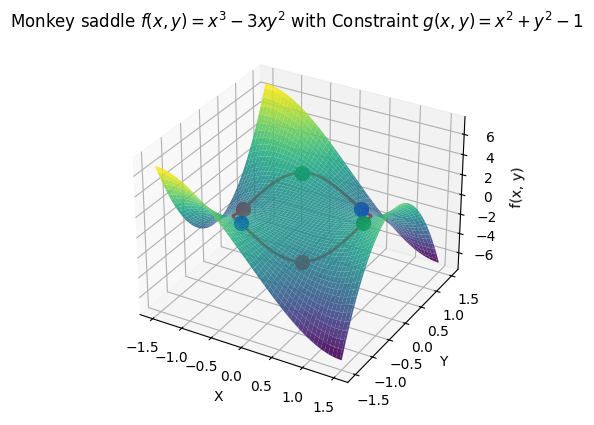

In [22]:
# Define the function f(x, y)
def f(x, y):
    return x**3 - 3 * x * y**2
    # return x**2 - y**2


# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1


# Create a grid of x and y values
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for the surface plot
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()

# Plot the 3D surface
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9)

# Initialize the line for the constraint path
(line,) = ax.plot(
    x_circle,
    y_circle,
    zs=f(x_circle, y_circle),
    zdir="z",
    color="red",
    alpha=1.0,
    linewidth=2,
)

critical_point1 = [(-1, 0), (1 / 2, -np.sqrt(3) / 2)]
critical_point2 = [(1 / 2, np.sqrt(3) / 2), (-1 / 2, -np.sqrt(3) / 2)]
critical_point3 = [(-1 / 2, np.sqrt(3) / 2), (1, 0)]
ax.scatter(
    critical_point1[0][0],
    critical_point1[0][1],
    f(*critical_point1[0]),
    color="red",
    s=100,
)
ax.scatter(
    critical_point1[1][0],
    critical_point1[1][1],
    f(*critical_point1[1]),
    color="red",
    s=100,
)
ax.scatter(
    critical_point2[0][0],
    critical_point2[0][1],
    f(*critical_point2[0]),
    color="blue",
    s=100,
)
ax.scatter(
    critical_point2[1][0],
    critical_point2[1][1],
    f(*critical_point2[1]),
    color="blue",
    s=100,
)
ax.scatter(
    critical_point3[0][0],
    critical_point3[0][1],
    f(*critical_point3[0]),
    color="green",
    s=100,
)
ax.scatter(
    critical_point3[1][0],
    critical_point3[1][1],
    f(*critical_point3[1]),
    color="green",
    s=100,
)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title(
    "Monkey saddle $f(x, y) = x^3 - 3xy^2$ with Constraint $g(x, y) = x^2 + y^2 - 1$"
)

# plt.savefig('lagrangian_monkey_saddle_critical_points.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

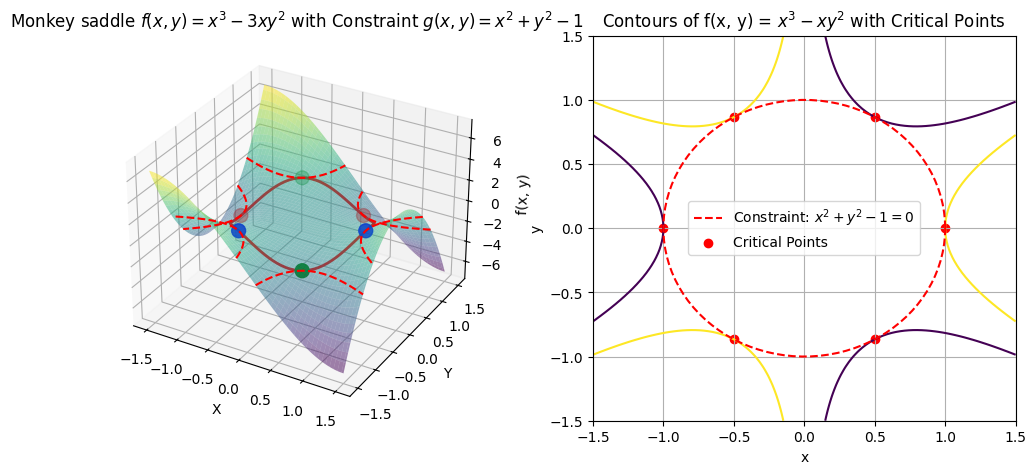

In [23]:
# Define the function f(x, y)
def f(x, y):
    return x**3 - 3 * x * y**2


# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1


# Create a grid of x and y values
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for the surface plot
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 5))

# Plot the 3D surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)

# Plot the constraint region g(x, y) = 1
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Initialize the line for the constraint path
(line,) = ax1.plot(
    x_circle,
    y_circle,
    zs=f(x_circle, y_circle),
    zdir="z",
    color="red",
    alpha=1.0,
    linewidth=2,
)

# Find the function values at critical points
critical_points = [
    (-1, 0),
    (1 / 2, -np.sqrt(3) / 2),
    (1 / 2, np.sqrt(3) / 2),
    (-1 / 2, -np.sqrt(3) / 2),
    (-1 / 2, np.sqrt(3) / 2),
    (1, 0),
]
Z_critical = [f(point[0], point[1]) for point in critical_points]

# Sort the function values at critical points
Z_critical_sorted = sorted(set([-1, 1]))

# Plot the contours of f(x, y) at critical points
contour = ax1.contour(
    X, Y, Z, levels=Z_critical_sorted, zdir="z", colors="red", linestyles="dashed"
)

# Scatter plot for critical points
x_critical = [point[0] for point in critical_points]
y_critical = [point[1] for point in critical_points]
ax1.scatter(
    x_critical,
    y_critical,
    Z_critical,
    s=100,
    color=["red", "green", "red", "blue", "green", "blue"],
    label="Critical Points",
)

# Set labels and title
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(x, y)")
ax1.set_title(
    "Monkey saddle $f(x, y) = x^3 - 3xy^2$ with Constraint $g(x, y) = x^2 + y^2 - 1$"
)

ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=Z_critical_sorted, cmap="viridis")

# Plot the constraint x^2 + y^2 - 1 = 0 as a circle
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax2.plot(
    x_circle,
    y_circle,
    color="red",
    linestyle="--",
    label="Constraint: $x^2 + y^2 - 1 = 0$",
)

# Scatter plot for critical points
x_critical = [point[0] for point in critical_points]
y_critical = [point[1] for point in critical_points]
ax2.scatter(x_critical, y_critical, color="red", label="Critical Points")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Contours of f(x, y) = $x^3 - xy^2$ with Critical Points")
ax2.legend(loc="center")
ax2.grid(True)

# plt.savefig('lagrangian_monkey_saddle_critical_points_level_set.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

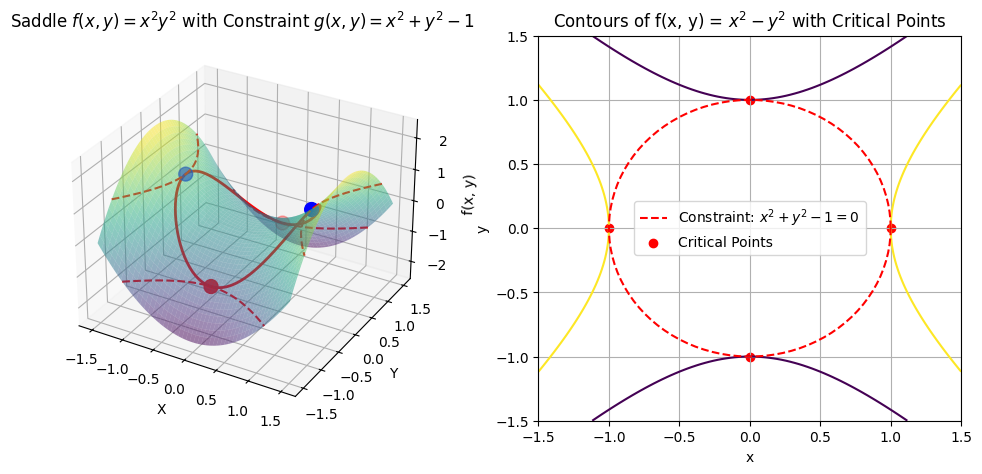

In [24]:
# Define the function f(x, y)
def f(x, y):
    # return x**3 - 3*x*y**2
    return x**2 - y**2


# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1


# Create a grid of x and y values
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for the surface plot
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 5))

# Plot the 3D surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)

# Plot the constraint region g(x, y) = 1
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Initialize the line for the constraint path
(line,) = ax1.plot(
    x_circle,
    y_circle,
    zs=f(x_circle, y_circle),
    zdir="z",
    color="red",
    alpha=1.0,
    linewidth=2,
)

# Find the function values at critical points
critical_points = [(0, -1), (0, 1), (-1, 0), (1, 0)]
Z_critical = [f(point[0], point[1]) for point in critical_points]

# Sort the function values at critical points
Z_critical_sorted = sorted(set([-1, 1]))

# Plot the contours of f(x, y) at critical points
contour = ax1.contour(
    X, Y, Z, levels=Z_critical_sorted, zdir="z", colors="red", linestyles="dashed"
)

# Scatter plot for critical points
x_critical = [point[0] for point in critical_points]
y_critical = [point[1] for point in critical_points]
ax1.scatter(
    x_critical,
    y_critical,
    Z_critical,
    s=100,
    color=["red", "red", "blue", "blue"],
    label="Critical Points",
)

# Set labels and title
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(x, y)")
ax1.set_title("Saddle $f(x, y) = x^2 y^2$ with Constraint $g(x, y) = x^2 + y^2 - 1$")

ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=Z_critical_sorted, cmap="viridis")

# Plot the constraint x^2 + y^2 - 1 = 0 as a circle
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax2.plot(
    x_circle,
    y_circle,
    color="red",
    linestyle="--",
    label="Constraint: $x^2 + y^2 - 1 = 0$",
)

# Scatter plot for critical points
x_critical = [point[0] for point in critical_points]
y_critical = [point[1] for point in critical_points]
ax2.scatter(x_critical, y_critical, color="red", label="Critical Points")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Contours of f(x, y) = $x^2 - y^2$ with Critical Points")
ax2.legend(loc="center")
ax2.grid(True)

# plt.savefig('lagrangian_saddle_critical_points_level_set.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

## Visualizing the L1 constraint region

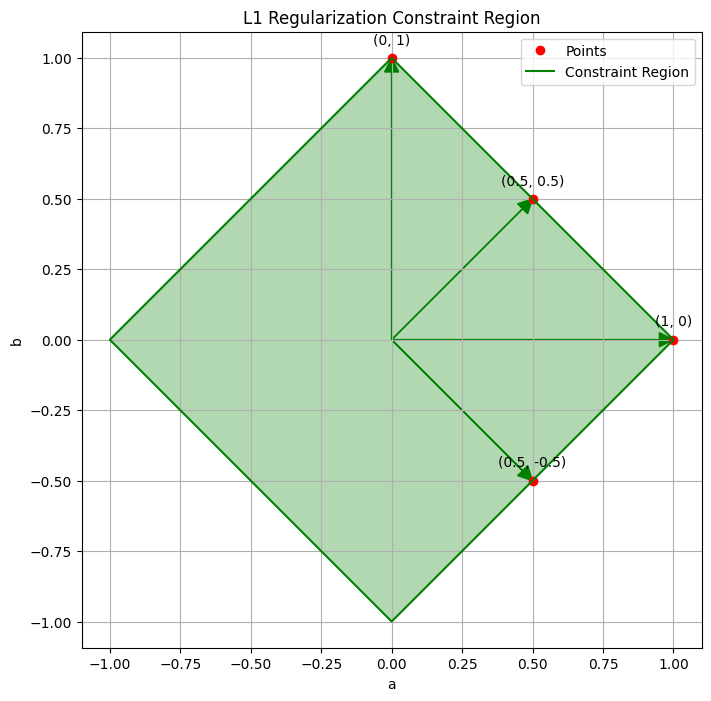

In [25]:
# Define points
points = np.array([[0.5, 0.5], [1, 0], [0, 1], [0.5, -0.5]])

# Plot points and diamond shape
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.plot(points[:, 0], points[:, 1], "ro", label="Points")

# Plot vectors from origin to points
for point in points:
    ax.arrow(
        0,
        0,
        point[0],
        point[1],
        head_width=0.05,
        head_length=0.05,
        fc="g",
        ec="g",
        length_includes_head=True,
    )

# Plot diamond shape
ax.fill([1.0, 0, -1.0, 0], [0, 1.0, 0, -1.0], "g", alpha=0.3)

# Plot constraint region line
ax.plot([1, 0, -1, 0, 1], [0, 1, 0, -1, 0], "g-", label="Constraint Region")

# Annotate points
for i, txt in enumerate(["(0.5, 0.5)", "(1, 0)", "(0, 1)", "(0.5, -0.5)"]):
    ax.annotate(
        txt,
        (points[i, 0], points[i, 1]),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )

# Add animated vector from origin to a + b = 1
(vector,) = ax.plot([], [], "b-", lw=2)


# Initialize the vector
def init():
    vector.set_data([], [])
    return (vector,)


xs = np.array(np.linspace(1, -1, 100).tolist() + np.linspace(-1, 1, 100).tolist())

# Initialize text object for displaying current values of a and b
text = ax.text(-1.0, 0.9, "", fontsize=12, color="black")


# Function to update the vector's position
def update(frame):
    # Calculate x and y coordinates for the vector
    x = xs[frame]
    y = 1 - np.abs(x)
    if frame >= 100:
        y = -y

    vector.set_data([0, x], [0, y])  # Update vector's position

    # Update text with current values of a and b
    text.set_text(
        rf"$a$ = {x:.2f}, $b$ = {y:.2f}"
        + "\n"
        + rf"$|a|$ + $|b|$ = {np.abs(x) + np.abs(y):.2f}"
    )

    return (vector,)


# Create animation
ani = FuncAnimation(plt.gcf(), update, frames=range(len(xs)), init_func=init, blit=True)

plt.xlabel("a")
plt.ylabel("b")
plt.title("L1 Regularization Constraint Region")
plt.axis("equal")
plt.legend()
plt.grid(True)
# ani.save('constraint_region_l1_diamond_animation.gif', writer='imagemagick', dpi=150, fps=30)
plt.show()

In [26]:
HTML(ani.to_html5_video())

## The L1 penalty promotes sparser solutions

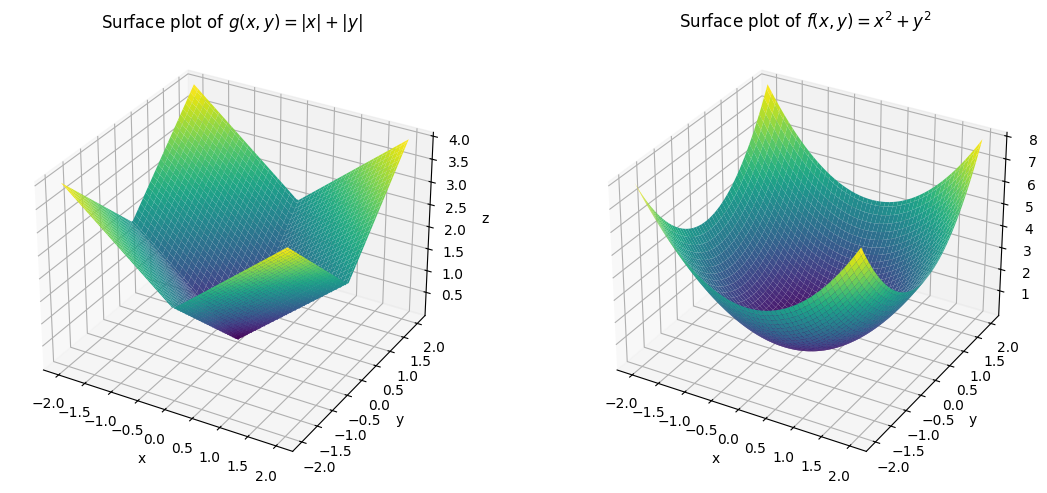

In [27]:
# Define the functions f(x, y) and g(x, y)
def f(x, y):
    return x**2 + y**2


def g(x, y):
    return np.abs(x) + np.abs(y)


# Generate x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate function values
Z_f = f(X, Y)
Z_g = g(X, Y)

# Plotting
fig = plt.figure(figsize=(12, 5))

# Panel 2: Plot of g(x, y) = |x| + |y|
ax2 = fig.add_subplot(121, projection="3d")
ax2.plot_surface(X, Y, Z_g, cmap="viridis")
ax2.set_title("Surface plot of $g(x, y) = |x| + |y|$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

# Panel 1: Plot of f(x, y) = x^2 + y^2
ax1 = fig.add_subplot(122, projection="3d")
ax1.plot_surface(X, Y, Z_f, cmap="viridis")
ax1.set_title("Surface plot of $f(x, y) = x^2 + y^2$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
plt.tight_layout()
# plt.savefig('l1_l2_surface_plots.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/3914009851.py:44: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title("$\lambda \cdot (x^2 + y^2)$")


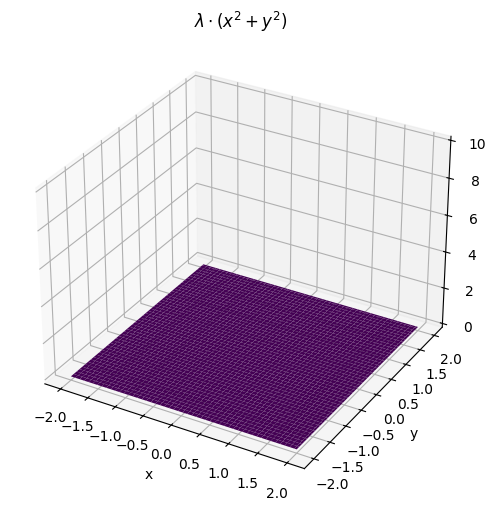

In [28]:
# Define the functions f(x, y)
def f(x, y):
    return x**2 + y**2


# Generate x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Initialize empty plot object
plot = [ax.plot_surface(X, Y, np.zeros_like(X), cmap="viridis")]

# Set Z-axis limit
ax.set_zlim(0, 10)


# Animation function
def animate(lambda_val):
    Z = lambda_val * f(X, Y)
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, Z, cmap="viridis")
    # Update text annotation
    text.set_text(rf"$\lambda$ = {lambda_val:.2f}")
    return text


# Initialize text annotation
text = ax.text2D(0.5, 0.9, "", transform=ax.transAxes, ha="center", fontsize=14)

# Set up animation
ani = FuncAnimation(
    fig, animate, frames=np.concatenate([np.logspace(-1, 1, 50)]), interval=50
)

# Set axis labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$\lambda \cdot (x^2 + y^2)$")

# ani.save('lambda_l2_animation.gif', writer='imagemagick', dpi=150)

# Show animation
plt.show()

In [29]:
HTML(ani.to_html5_video())

<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
/var/folders/4k/9rqmps197lzg1p4s1tln61000000gn/T/ipykernel_844/3830491664.py:44: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title("$\lambda \cdot (|x| + |y|)$")


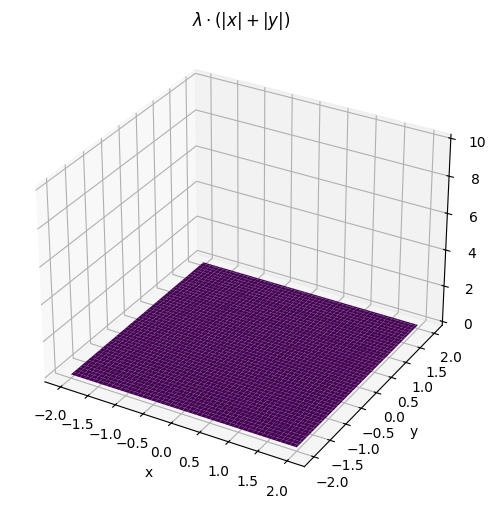

In [30]:
# Define the functions f(x, y)
def f(x, y):
    return np.abs(x) + np.abs(y)


# Generate x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Initialize empty plot object
plot = [ax.plot_surface(X, Y, np.zeros_like(X), cmap="viridis")]

# Set Z-axis limit
ax.set_zlim(0, 10)


# Animation function
def animate(lambda_val):
    Z = lambda_val * f(X, Y)
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, Z, cmap="viridis")
    # Update text annotation
    text.set_text(rf"$\lambda$ = {lambda_val:.2f}")
    return text


# Initialize text annotation
text = ax.text2D(0.5, 0.9, "", transform=ax.transAxes, ha="center", fontsize=14)

# Set up animation
ani = FuncAnimation(
    fig, animate, frames=np.concatenate([np.logspace(-1, 1, 50)]), interval=50
)

# Set axis labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$\lambda \cdot (|x| + |y|)$")

# ani.save('lambda_l1_animation.gif', writer='imagemagick', dpi=150)

# Show animation
plt.show()

In [31]:
HTML(ani.to_html5_video())

## Training a Lasso Regression model from scratch

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


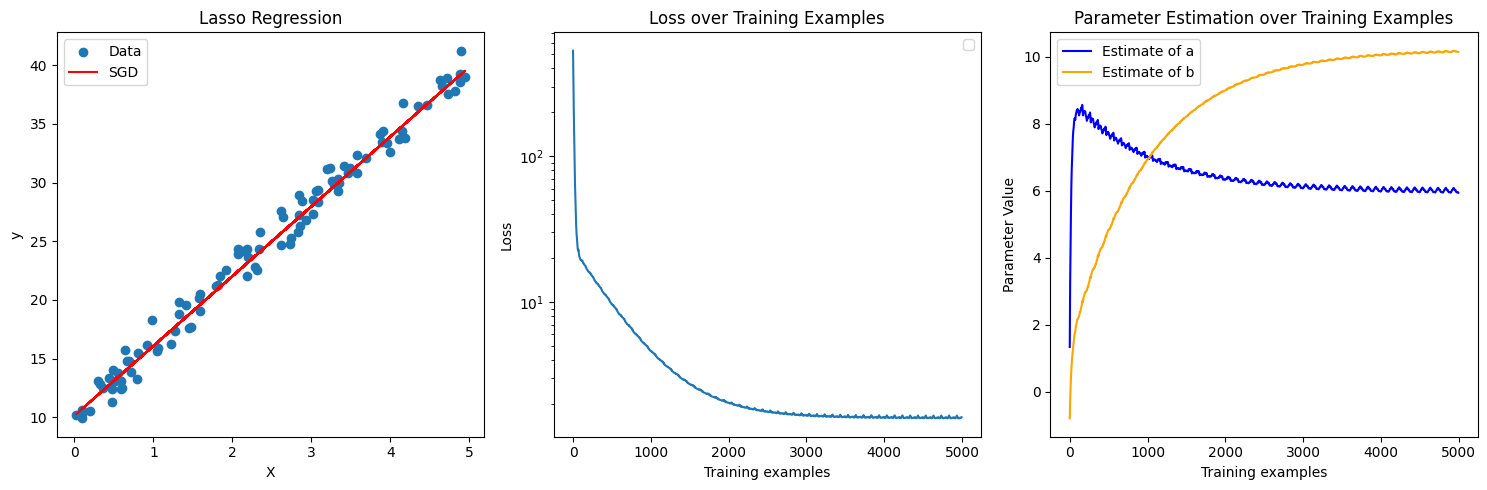

SGD - Intercept (b): 10.144724748947484
SGD - Coefficient (a): [5.94569188]


In [32]:
# Generate synthetic data
np.random.seed(0)
# Random values between 0 and 5
X = 5 * np.random.rand(100, 1)
# Underlying model 10 + 6x plus random noise
y = 10 + 6 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Compute closed-form solution for Ridge Regression
lambda_ = 0.1  # Regularization parameter
m, n = X_b.shape  # Number of rows and columns of the design matrix X


# Define function for computing gradients
def compute_gradients(X, y, a, b, lambda_, batch_size):
    gradients_a = -2 / batch_size * X.T.dot(
        y - (a * X + b)
    ) + 1 / batch_size * lambda_ * np.sum(np.sign(a))
    gradient_b = -2 / batch_size * np.sum(y - (a * X + b))
    return gradients_a, gradient_b


# Train Ridge Regression model with Stochastic Gradient Descent
def lasso_regression_sgd(X, y, alpha, lambda_, n_iterations, batch_size):
    a = np.random.randn(1)  # Random initialization of parameter a
    b = np.random.randn(1)  # Random initialization of parameter b
    losses = []  # Keep track of loss as we progress
    estimates_a = []  # Keep track of the estimate of a as we progress
    estimates_b = []  # Keep track of the estimate of b as we progress

    # Shuffle the training examples every epoch
    m = len(X)
    indices = np.random.randint(
        m, size=batch_size
    )  # Select random indices for mini-batch
    iterations_per_epoch = m // batch_size  # Number of iterations per epoch

    for iteration in range(n_iterations):
        # Reshuffle the random indices for mini-batch for each epoch
        if iteration % iterations_per_epoch == 0:
            indices = np.random.randint(m, size=batch_size)

        # Mini-batch offset
        idx_from, idx_to = (batch_size * iteration % m), (
            batch_size * iteration % m
        ) + batch_size
        X_batch = X[idx_from:idx_to]
        y_batch = y[idx_from:idx_to]

        # Compute the gradients
        gradients_a, gradient_b = compute_gradients(
            X_batch, y_batch, a, b, lambda_, batch_size
        )

        # Update step
        a = a - alpha * gradients_a  # Update parameter a
        b = b - alpha * gradient_b  # Update parameter b

        # Compute loss at each iteration
        loss = np.mean((y - (a * X + b)) ** 2) + lambda_ * np.sum(np.abs(a))

        # Store the current loss and estimates of a and b
        losses.append(loss)
        estimates_a.append(a[0])
        estimates_b.append(b[0])
    return a, b, losses, estimates_a, estimates_b


# Hyperparameters
alpha = 0.01  # Learning rate
batch_size = 5  # Mini-batch size
n_iterations = 1000  # Number of iterations (update steps)

# Train Ridge Regression model
a_sgd, b_sgd, losses, estimates_a, estimates_b = lasso_regression_sgd(
    X, y, alpha, lambda_, n_iterations, batch_size
)

# Plot the data and the fitted lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# First subplot: Data and Fitted lines
axes[0].scatter(X, y, label="Data")
axes[0].plot(
    X, X_b.dot(np.array([b_sgd[0], a_sgd[0].squeeze()])), color="red", label="SGD"
)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("Lasso Regression")
axes[0].legend()

# Second subplot: Loss over Iterations
axes[1].plot(np.arange(len(losses)) * batch_size, np.array(losses).squeeze())
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("Loss")
axes[1].set_yscale("log")
axes[1].set_title("Loss over Training Examples")
axes[1].legend()

# Third subplot: Parameter Estimation over Iterations
axes[2].plot(
    np.arange(len(losses)) * batch_size,
    estimates_a,
    label="Estimate of a",
    color="blue",
)
axes[2].plot(
    np.arange(len(losses)) * batch_size,
    estimates_b,
    label="Estimate of b",
    color="orange",
)
axes[2].set_xlabel("Training examples")
axes[2].set_ylabel("Parameter Value")
axes[2].set_title("Parameter Estimation over Training Examples")
axes[2].legend()

plt.tight_layout()
plt.show()

# Print the parameters
print("SGD - Intercept (b):", b_sgd[0])
print("SGD - Coefficient (a):", a_sgd[0])

## Real-world example: predicting house prices

In [33]:
# Kaggle housing dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
df = pd.read_csv("Housing.csv")
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [34]:
# When given the key 'no' return 0, otherwise if the key is 'yes' return 1
remap = {"no": 0, "yes": 1}
# An array to store the new recoded results
recoded = []
# Loop over a column (basement in this case) and recoded the values
for value in df.basement:
    recoded.append(remap[value])

In [35]:
recoded[0:5]

[0, 0, 1, 1, 1]

In [36]:
df.basement[0:5]

0     no
1     no
2    yes
3    yes
4    yes
Name: basement, dtype: object

In [37]:
def recode_yes_no(series: pd.Series) -> pd.Series:
    # When given the key 'no' return 0, otherwise if the key is 'yes' return 1
    remap = {"no": 0, "yes": 1}
    # An array to store the new recoded results
    recoded = []
    # Loop over a column (basement in this case) and recoded the values
    for value in series:
        recoded.append(remap[value])

    # Return the recoded array as a Pandas Series object
    return pd.Series(recoded)

In [38]:
# Specify the Boolean columns
target_columns = [
    "basement",
    "mainroad",
    "guestroom",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]
# Use `apply` to apply our function to each column.
df[target_columns] = df[target_columns].apply(recode_yes_no)

In [39]:
df[target_columns]

basement  mainroad  guestroom  hotwaterheating  airconditioning  prefarea
0           0         1          0                0                1         1
1           0         1          0                0                1         0
2           1         1          0                0                0         1
3           1         1          0                0                1         1
4           1         1          1                0                1         0
..        ...       ...        ...              ...              ...       ...
540         1         1          0                0                0         0
541         0         0          0                0                0         0
542         0         1          0                0                0         0
543         0         0          0                0                0         0
544         0         1          0                0                0         0

[545 rows x 6 columns]

In [40]:
# A set is a data structure (and mathematical concept) that
# contains unique values.
keys = set()
# Loop over all the values in a column and add the value to the set
for value in df.furnishingstatus:
    keys.add(value)

In [41]:
keys

{'furnished', 'semi-furnished', 'unfurnished'}

In [42]:
remap = {k: i for i, k in enumerate(keys)}

In [43]:
remap

{'semi-furnished': 0, 'furnished': 1, 'unfurnished': 2}

In [44]:
# Store the recoded values
recoded = []
# Loop over the furnishingstatus column
for value in df.furnishingstatus:
    # Create an array of 0's that is as long as the number
    # of keys we have
    ret = np.zeros(len(remap))
    # Set the corresponding value in the array to 1
    ret[remap[value]] = 1
    # Store the recoded array
    recoded.append(ret)

In [45]:
recoded[0:10]

[array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([0., 0., 1.])]

In [46]:
df.furnishingstatus[0:10]

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
5    semi-furnished
6    semi-furnished
7       unfurnished
8         furnished
9       unfurnished
Name: furnishingstatus, dtype: object

In [47]:
pd.DataFrame(recoded, columns=remap.keys())

semi-furnished  furnished  unfurnished
0               0.0        1.0          0.0
1               0.0        1.0          0.0
2               1.0        0.0          0.0
3               0.0        1.0          0.0
4               0.0        1.0          0.0
..              ...        ...          ...
540             0.0        0.0          1.0
541             1.0        0.0          0.0
542             0.0        0.0          1.0
543             0.0        1.0          0.0
544             0.0        0.0          1.0

[545 rows x 3 columns]

In [48]:
furnishing_df = pd.DataFrame(recoded, columns=remap.keys())

In [49]:
# Drop the categorical furnishingstatus column and concatenate the new columns
df = pd.concat([df.drop("furnishingstatus", axis=1), furnishing_df], axis=1)

In [50]:
df

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     semi-furnished  furnished  unfurnished  
0               0.0        1.0          0.0  
1               0.0        1.0          0.0  
2               1.0        0.0          0.0  
3               0.0        1.0          0.0  
4               0.0        1.0          0.0  
..              ...        ...          ...  
540             0.0        0.0          1.0  
541             1.0        0.0          0.0  
542             0.0        0.0          1.0  
543             0.0        1.0          0.0  
544             0.0        0.0          1.0  

[545 rows x 15 columns]

In [51]:
np.random.seed(0)

# Split data into 80% train and 20% test
X = df.iloc[:, 1:]  # Design matrix is all columns except the response variable
y = df.iloc[:, 0]  # Response variable (cost)
# Randomly permute an array of row numbers 0,1,2,...,rows of X
shuffled_order = np.random.permutation(np.arange(len(X)))
# Training indices are then the first 80%
train_idx = shuffled_order[0 : int(len(shuffled_order) * 0.8)]
# Testing indices are the 20% following the first 80%
test_idx = shuffled_order[int(len(shuffled_order) * 0.8) :]

# Select train and test splits for X and y
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [52]:
X_train

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
239   4000         3          1        2         1          0         0   
113   9620         3          1        1         1          0         1   
325   3460         4          1        2         1          0         0   
66   13200         2          1        1         1          0         1   
479   3660         4          1        2         0          0         0   
..     ...       ...        ...      ...       ...        ...       ...   
419   4960         4          1        3         0          0         0   
62    6240         4          2        2         1          0         0   
478   3600         3          1        2         0          0         0   
377   2850         3          2        2         0          0         1   
130   4800         3          1        1         1          1         1   

     hotwaterheating  airconditioning  parking  prefarea  semi-furnished  \
239                0                0        1         0             0.0   
113                0                0        2         1             0.0   
325                0                1        0         0             1.0   
66                 1                0        1         0             0.0   
479                0                0        0         0             0.0   
..               ...              ...      ...       ...             ...   
419                0                0        0         0             1.0   
62                 0                1        1         0             0.0   
478                0                0        1         0             0.0   
377                0                0        0         1             0.0   
130                0                0        0         0             0.0   

     furnished  unfurnished  
239        1.0          0.0  
113        1.0          0.0  
325        0.0          0.0  
66         1.0          0.0  
479        0.0          1.0  
..         ...          ...  
419        0.0          0.0  
62         1.0          0.0  
478        0.0          1.0  
377        0.0          1.0  
130        0.0          1.0  

[436 rows x 14 columns]

In [53]:
y_train

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
419    3360000
62     7070000
478    2940000
377    3640000
130    5866000
Name: price, Length: 436, dtype: int64

In [54]:
# Normalize dataset using the train data
# For the design matrix
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std
# For the response variable
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [55]:
X_train

area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
239 -0.533828  0.049674  -0.567480  0.243964  0.402857  -0.477122 -0.734436   
113  1.987266  0.049674  -0.567480 -0.937907  0.402857  -0.477122  1.358466   
325 -0.776069  1.403280  -0.567480  0.243964  0.402857  -0.477122 -0.734436   
66   3.593231 -1.303933  -0.567480 -0.937907  0.402857  -0.477122  1.358466   
479 -0.686350  1.403280  -0.567480  0.243964 -2.476579  -0.477122 -0.734436   
..        ...       ...        ...       ...       ...        ...       ...   
419 -0.103179  1.403280  -0.567480  1.425835 -2.476579  -0.477122 -0.734436   
62   0.471021  1.403280   1.365499  0.243964  0.402857  -0.477122 -0.734436   
478 -0.713265  0.049674  -0.567480  0.243964 -2.476579  -0.477122 -0.734436   
377 -1.049710  0.049674   1.365499  0.243964 -2.476579  -0.477122  1.358466   
130 -0.174953  0.049674  -0.567480 -0.937907  0.402857   2.091092  1.358466   

     hotwaterheating  airconditioning   parking  prefarea  semi-furnished  \
239        -0.213211        -0.654617  0.405974 -0.548453       -0.829663   
113        -0.213211        -0.654617  1.586003  1.819127       -0.829663   
325        -0.213211         1.524108 -0.774056 -0.548453        1.202545   
66          4.679426        -0.654617  0.405974 -0.548453       -0.829663   
479        -0.213211        -0.654617 -0.774056 -0.548453       -0.829663   
..               ...              ...       ...       ...             ...   
419        -0.213211        -0.654617 -0.774056 -0.548453        1.202545   
62         -0.213211         1.524108  0.405974 -0.548453       -0.829663   
478        -0.213211        -0.654617  0.405974 -0.548453       -0.829663   
377        -0.213211        -0.654617 -0.774056  1.819127       -0.829663   
130        -0.213211        -0.654617 -0.774056 -0.548453       -0.829663   

     furnished  unfurnished  
239   1.668803    -0.697807  
113   1.668803    -0.697807  
325  -0.597858    -0.697807  
66    1.668803    -0.697807  
479  -0.597858     1.429773  
..         ...          ...  
419  -0.597858    -0.697807  
62    1.668803    -0.697807  
478  -0.597858     1.429773  
377  -0.597858     1.429773  
130  -0.597858     1.429773  

[436 rows x 14 columns]

In [56]:
y_train

239   -0.096731
113    0.696367
325   -0.402482
66     1.144801
479   -0.967657
         ...   
419   -0.745293
62     1.218923
478   -0.967657
377   -0.597050
130    0.581479
Name: price, Length: 436, dtype: float64

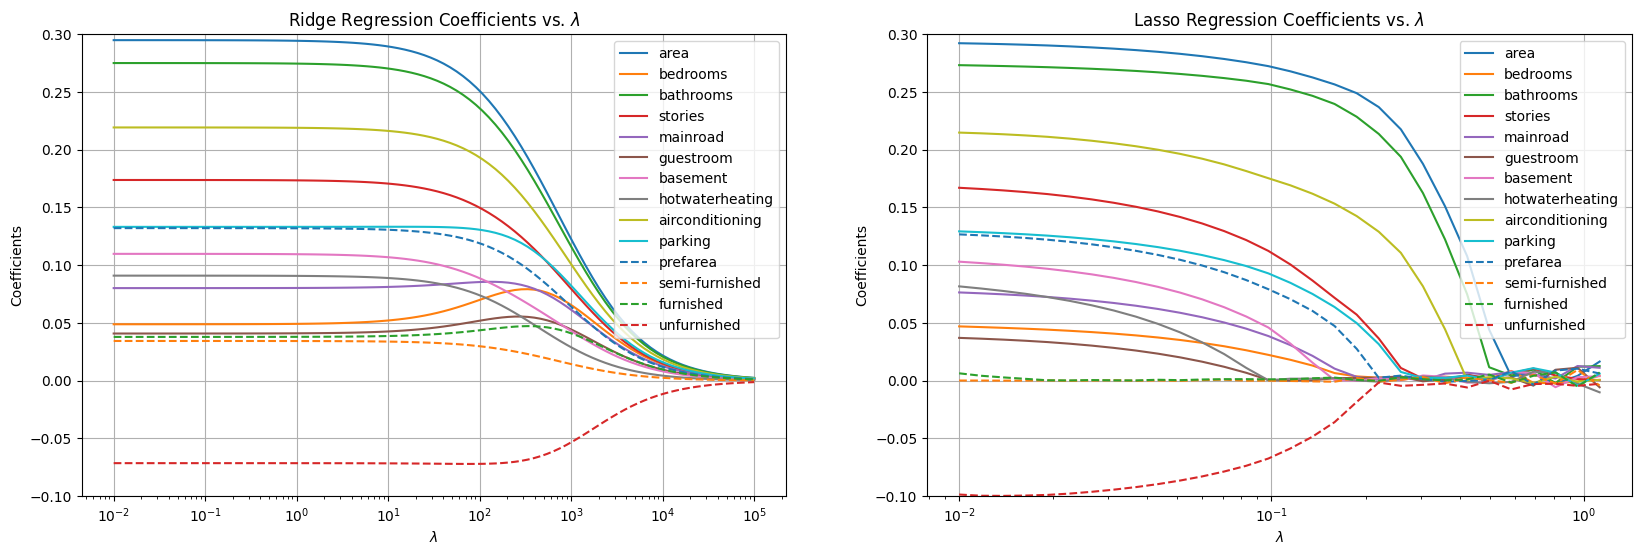

In [57]:
# Define range of alpha values
alphas = np.logspace(-2, 5, 100)  # Using logarithmic scale for alpha

# Initialize arrays to store coefficient values for Ridge
ridge_coefficients = []
lasso_coefficients = []

# Add bias term to X
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]


def ridge_analytical_solution(X, y, alpha):
    # Compute the identity matrix
    I = np.eye(X.shape[1])
    I[0][0] = 0  # Do not penalize the intercept term
    # Compute the analytical solution
    return np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y


# Define function for computing gradients
def lasso_regression_sgd(X, y, alpha, lambda_, n_iterations):
    # Step 1: Initialize coefficients
    # np.random.seed(42)
    n_features = X.shape[1]
    theta = np.zeros(n_features)

    # Add a bias term
    bias = 0.0

    # Step 2: Perform gradient descent
    for _ in range(n_iterations):
        # Step 3: Compute predictions for the entire dataset
        predictions = np.dot(X, theta) + bias

        # Step 4: Compute errors for the entire dataset
        errors = predictions - y

        # Step 5: Compute gradient using vectorized operations
        gradient = np.dot(X.T, errors) / X.shape[0]

        # Step 6: Update coefficients with L1 regularization (Lasso) using soft thresholding
        # Update rule for regular coefficients
        theta -= alpha * (gradient + lambda_ * np.sign(theta))

        # Update rule for bias term (not penalized)
        bias_gradient = np.mean(errors)
        bias -= alpha * bias_gradient

    return theta, bias


# Iterate over alpha values
for alpha in alphas:
    # Perform Ridge regression
    ridge_analytic = ridge_analytical_solution(X_train_b, y_train, alpha)
    ridge_coefficients.append(ridge_analytic[1:])

    # Perform Lasso regression
    lasso_sgd_a, lasso_sgd_b = lasso_regression_sgd(
        X_train, y_train, 1e-2, lambda_=alpha, n_iterations=1000
    )
    lasso_coefficients.append(lasso_sgd_a)

# # Plot the coefficients as a function of alpha
plt.figure(figsize=(20, 6))

# Plot ridge coefficients
plt.subplot(1, 2, 1)

for i in range(X.shape[1]):
    plt.plot(
        alphas,
        [r[i] for r in ridge_coefficients],
        label=X.columns[i],
        linestyle="-" if i < 10 else "--",
    )

plt.xlabel(r"$\lambda$")
plt.ylabel("Coefficients")
plt.xscale("log")  # Using logarithmic scale for alpha
plt.title(r"Ridge Regression Coefficients vs. $\lambda$")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 0.3)

# Plot Lasso
plt.subplot(1, 2, 2)

# # Plot Ridge coefficients
for i in range(X.shape[1]):
    plt.plot(
        alphas[0:30],
        [r[i] for r in lasso_coefficients[0:30]],
        label=X.columns[i],
        linestyle="-" if i < 10 else "--",
    )

plt.xlabel(r"$\lambda$")
plt.ylabel("Coefficients")
plt.xscale("log")  # Using logarithmic scale for alpha
plt.title(r"Lasso Regression Coefficients vs. $\lambda$")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 0.3)

# plt.savefig('kaggle_house_prices_ridge_lasso_increasing_lambda.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()